In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install circlify

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
#import missingno as msno
plt.rcParams['figure.dpi'] = 140


import pycountry 
import plotly.express as px
import plotly.graph_objects as go
import json

In [7]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


This is always scenario dependant, but in this case, I will:
replace blank countries with the mode (most common) country
I want to keep director as it could be interesting to look at a certain director's films
I want to keep cast as it could be interesting to look at a certain cast's films

In [9]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [12]:
#df["date_added"] = pd.to_datetime(df['date_added'])

#df['month_added']=df['date_added'].dt.month
#df['month_name_added']=df['date_added'].dt.month_name()
#df['year_added'] = df['date_added'].dt.year

#df.head(3)

In [13]:
# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: first_country, dtype: object

In [14]:
#ratings_ages = {
#    'TV-PG': 'Older Kids',
#     'TV-MA': 'Adults',
#     'TV-Y7-FV': 'Older Kids',
#     'TV-Y7': 'Older Kids',
#     'TV-14': 'Teens',
#     'R': 'Adults',
#     'TV-Y': 'Kids',
#     'NR': 'Adults',
#     'PG-13': 'Teens',
#     'TV-G': 'Kids',
#     'PG': 'Older Kids',
#     'G': 'Kids',
#     'UR': 'Adults',
#     'NC-17': 'Adults'
# }

# df['target_ages'] = df['rating'].replace(ratings_ages)
# df['target_ages'].unique()

In [15]:
# Genre
#df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,United States
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,United States
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,United States
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,India


In [17]:
df.describe()

,release_year,count
count,8790.000000,8790.0
mean,2014.183163,1.0
std,8.825466,0.0
min,1925.000000,1.0
25%,2013.000000,1.0
50%,2017.000000,1.0
75%,2019.000000,1.0
max,2021.000000,1.0


In [18]:
df =df[['first_country', 'release_year', 'count']]
mydf =df
#print(mydf['first_country'].unique().shape)   #the number of countries
df

,first_country,release_year,count
0,United States,2020,1
1,South Africa,2021,1
2,United States,2021,1
3,United States,2021,1
4,India,2021,1
...,...,...,...
8802,United States,2007,1
8803,United States,2018,1
8804,United States,2009,1
8805,United States,2006,1


In [19]:

a1= []
a2=[]
for group, frame in mydf.groupby('first_country'):
  n_items= frame.count()['release_year']
  a1.append(group)
  a2.append(n_items)

mydf = pd.DataFrame()
mydf['Country'] = a1
mydf['Number_of_Items'] = a2
mydf

,Country,Number_of_Items
0,Argentina,76
1,Australia,115
2,Austria,9
3,Bangladesh,3
4,Belarus,1
...,...,...
80,Uruguay,9
81,Venezuela,2
82,Vietnam,7
83,West Germany,1


In [20]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
    
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 

mydf['Code']=alpha3code(mydf.Country)
mydf.head()

,Country,Number_of_Items,Code
0,Argentina,76,ARG
1,Australia,115,AUS
2,Austria,9,AUT
3,Bangladesh,3,BGD
4,Belarus,1,BLR


In [20]:
fig = px.choropleth(mydf, locations="Code", 
                    color="Number_of_Items", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Burg,
                    labels={'Number_of_Items':'Number of the items'},
                    projection="natural earth",
                   )
#fig.title(-175,110,'Which countries present movies on Netflix?',fontsize=35,fontweight='bold')
#fig.title(-175,102,'United States is the dominator',color='gray',fontsize=15)

fig.update_layout(font_color="black",
                  #title_font_family="Times New Roman",
                  title_font_color="black",
                  title="Contribution of Countries on Netflix from 1925 to 2021 <br><sup>The United States is the dominator</sup>",
                  title_font_size=18)
fig.show()

In [21]:
fig = px.scatter_geo(mydf, locations="Code", color="Number_of_Items", #locationmode='ISO-3',
                     hover_name="Country", size="Number_of_Items",
                     projection="natural earth",
                     color_continuous_scale= ['#fee5d9',
                                              '#e50914', '#d90913', '#cd0812','#c10811', '#b50710', '#771116',
                                             '#6a1317','#5d1519', 
                                              '#4e181a',
                                              '#3d1a1c',
                                              '#221f1f'
                                             ],
#                      color_continuous_scale= ['#e50914', '#d90913', '#cd0812','#c10811', '#b50710', '#a90911',
#                                              '#9c0b12', '#900d14', '#840f15','#771116',  '#6a1317','#5d1519',
#                                              '#4e181a','#3d1a1c',  '#221f1f'],
                     labels={'Number_of_Items':'Number of the items'}
                    )

# fig.update_layout(font_color="black",
#                   #title_font_family="Times New Roman",
#                   title_font_color="black",
#                   title="Contribution of Countries on Netflix from 1925 to 2021 <br><sup>The United States is the dominator</sup>",
#                   title_font_size=18,
#                   showlegend = True)



fig.update_layout(title=go.layout.Title(text="Contribution of different Countries on Netflix from 1925 to 2021", 
                                        font=dict(
                                            family="Serif",
                                            size=20,
                                            color="black"
                                        )))

fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='The United States is the dominator followed by India and The United Kingdom respectively.',
            xanchor='right',
            x=0.72,
            #yxshift=275,
            yanchor='top',
            y=1.07,
            align='left',
            xref='paper',
            yref='paper',
            font=dict(
                family="Serif",
                size=15,
                color="gray"
            )
        )])


fig.show()

In [22]:
print(px.colors.sequential.Burg)

['rgb(255, 198, 196)', 'rgb(244, 163, 168)', 'rgb(227, 129, 145)', 'rgb(204, 96, 125)', 'rgb(173, 70, 108)', 'rgb(139, 48, 88)', 'rgb(103, 32, 68)']


In [23]:
mydf2 = df.groupby(['first_country','release_year'], as_index=False)['count'].sum() #sum function
mydf2 = pd.DataFrame(mydf2)
mydf2 = mydf2.rename(columns={'first_country': 'Country',
                             'release_year':'Year',
                             'count':'Number_of_Items'})
mydf2 = mydf2.sort_values(['Year'])
#print(mydf2)



mydf2['Code']=alpha3code(mydf2.Country)

mydf2['Cum_Items']=mydf2['Number_of_Items']
#print(mydf2)
cum_items = mydf2.groupby(['Country'], as_index=False)['Cum_Items'].cumsum()
mydf2['Cum_Items']=cum_items




# determining the name of the file
#file_name = 'mydf2.xlsx' 
# saving the excel
#mydf2.to_excel(file_name)
print(type(mydf2['Cum_Items']))
mydf2

<class 'pandas.core.series.Series'>


,Country,Year,Number_of_Items,Code,Cum_Items
761,United States,1925,1,USA,1
762,United States,1942,2,USA,3
763,United States,1943,3,USA,6
764,United States,1944,3,USA,9
765,United States,1945,4,USA,13
...,...,...,...,...,...
344,Indonesia,2021,4,IDN,85
364,Israel,2021,3,ISR,22
122,Colombia,2021,3,COL,40
222,Germany,2021,7,DEU,103


# use the specefic dataset for map in which the cumulative number of items is included

In [24]:

df_cumitems= pd.read_csv('df_cumitems.csv')
df_cumitems['Code']=alpha3code(df_cumitems.Country)
print(type(df_cumitems['Cum_Items']))
df_cumitems

<class 'pandas.core.series.Series'>


,Country,Year,Cum_Items,Code
0,United States,1925,1,USA
1,United States,1942,3,USA
2,United States,1943,6,USA
3,United States,1944,9,USA
4,United States,1945,13,USA
...,...,...,...,...
6285,Cameroon,2017,0,CMR
6286,Cameroon,2018,0,CMR
6287,Cameroon,2019,0,CMR
6288,Cameroon,2020,1,CMR


In [25]:
mypallet= ['#e50914', '#d90913', '#cd0812','#c10811', '#b50710', '#771116',
                                              '#6a1317','#5d1519', '#4e181a','#3d1a1c','#221f1f']
mypallet_reverse = mypallet[::-1]

mycolors=['#eb6369','#f2464f','#f53842','#e3343d','#e3343d',
         '#cf2b33','#e8131d','#cc0e19','#b5050f','#000000']

In [26]:
fig = px.scatter_geo(df_cumitems, locations="Code", color="Cum_Items",
                     hover_name="Country", size="Cum_Items",
                     animation_frame="Year",
                     projection="natural earth",
                     color_continuous_scale= mypallet,
                      #color_continuous_scale= ['#e50914', '#d90913', '#cd0812','#c10811', '#b50710', '#a90911',
                       #                       '#9c0b12', '#900d14', '#840f15','#771116',  '#6a1317','#5d1519',
                        #                      '#4e181a','#3d1a1c',  '#221f1f'],
                     #color_continuous_scale=px.colors.sequential.Reds,
                     labels={'Cum_Items':'Total number <br> of the items'})


fig.update_layout(               #to design background of graph 
    plot_bgcolor='white',
    font=dict(color='dimgray', family='sans serif')     # to change the color of text like axis titles
)


# Adjust figure layout
fig.update_layout(
    plot_bgcolor='white',
    font=dict(color='dimgray')
    )


fig.update_layout(title=go.layout.Title(text="Contribution of different Countries on Netflix", 
                                        font=dict(
                                            family="sans serif",
                                            size=22,
                                            color="black"
                                        )))

fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Asia and Africa have the least contribution.',
            xanchor='right',
            x=0.364,
            #yxshift=275,
            yanchor='top',
            y=1.08,
            align='left',
            xref='paper',
            yref='paper',
            font=dict(
                family="sans serif",
                size=18,
                color="dimgray"
            )
        )])


fig.show()

In [27]:
print(px.colors.sequential.Reds)

['rgb(255,245,240)', 'rgb(254,224,210)', 'rgb(252,187,161)', 'rgb(252,146,114)', 'rgb(251,106,74)', 'rgb(239,59,44)', 'rgb(203,24,29)', 'rgb(165,15,21)', 'rgb(103,0,13)']


In [28]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import chart_studio

chart_studio.tools.set_credentials_file(username='elibabaei', api_key='Eli@123456')

py.plot(fig, filename = 'file', auto_open=True)

PlotlyRequestError: Bad API key

In [ ]:
import ImageSequence
import Image
import gifmaker
 
sequence = []

im = Image.open(fig)

# im is your original image
frames = [frame.copy() for frame in ImageSequence.Iterator(im)]

# write GIF animation
fp = open("out.gif", "wb")
gifmaker.makedelta(fp, frames)
fp.close()

## Creating the bubble plot

In [29]:
mydf_sorted = mydf.sort_values(by='Number_of_Items', ascending=False)
#mydf_sorted.head()
first_countries = mydf_sorted.head(12)
first_countries

,Country,Number_of_Items,Code
79,United States,4031,USA
29,India,1008,IND
78,United Kingdom,627,GBR
10,Canada,271,CAN
36,Japan,257,JPN
20,France,213,FRA
67,South Korea,212,None
69,Spain,181,ESP
44,Mexico,134,MEX
1,Australia,115,AUS


In [30]:
first_countries= first_countries.sort_values(by= 'Number_of_Items')
first_countries

,Country,Number_of_Items,Code
75,Turkey,111,TUR
18,Egypt,112,EGY
1,Australia,115,AUS
44,Mexico,134,MEX
69,Spain,181,ESP
67,South Korea,212,None
20,France,213,FRA
36,Japan,257,JPN
10,Canada,271,CAN
78,United Kingdom,627,GBR


In [31]:
uk = '#1d70b8'
dark_uk = '#003078'
others = 'lightgray'
background_color = "white"

In [32]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    first_countries['Number_of_Items'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

#print(circles)

In [33]:
pallet = ['#450302','#670503','#8a0604','#ac0805', '#cf0a06',
          '#f20b07','#f72925','#f94b48','#fa6d6a','#fb8f8d', '#221f1f']

colors= ['#fee5d9','#e50914', '#d90913', '#cd0812','#c10811', '#b50710', '#771116',  
                  '#6a1317','#5d1519', '#4e181a','#3d1a1c',  '#221f1f']

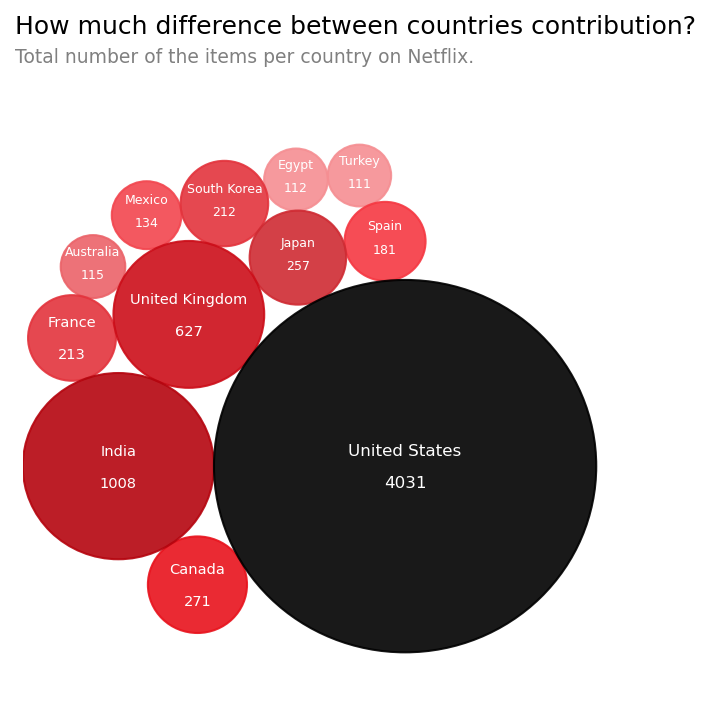

In [35]:
plt.rcParams['font.family'] = 'sens-serif'
fig = plt.figure(figsize=(5, 5),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax.spines[s].set_visible(False)

ax.set_facecolor(background_color)

# Title
ax.text(-1,1.3,'How much difference between countries contribution?',fontsize=12, 
        fontdict=None,
        #fontweight='bold', 
        #fontfamily='sans-serif'
       )
ax.text(-1,1.2,'Total number of the items per country on Netflix.',color='gray',fontsize=9, 
        fontdict=None,
        #fontfamily='sans-serif'
       )

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = first_countries['Country']
items = first_countries['Number_of_Items']
colors= ['#fa6d6a','#e50914','#d90913','#cd0812','#c10811','#b50710','#771116',
         '#6a1317','#5d1519','#4e181a','#3d1a1c','#000000']

pallet = ['#450302','#450302','#670503','#8a0604','#ac0805', '#cf0a06',
          '#f20b07','#f72925','#f94b48','#fa6d6a','#fb8f8d', '#000000']

mycolors= [ '#f58e92','#f58e92','#eb6369','#f2464f','#f53842','#e3343d','#e3343d',
         '#cf2b33','#e8131d','#cc0e19','#b5050f','#000000']

#colors = ['#221f1f' if val == first_countries['Number_of_Items'].max() 
#          else '#e6d4ff' for val in df['Value']]
# print circles
for circle, label, color, item in zip(circles, labels, mycolors, items):
    #if label == 'United States':
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, linewidth=1, color=color, edgecolor="black"))
        
        if label=='United States':
            plt.annotate(label, (x,y+0.05) ,va='center', ha='center',color='white', fontsize=8)
            plt.annotate(item, (x,y-0.06) ,va='center', ha='center', fontsize=8, color='white')
            
        elif label=='India'or label=='United Kingdom' or label=='Canada'\
             or label=='Japon' or label=='France':
                plt.annotate(label, (x,y+0.05) ,va='center', ha='center',color='white', fontsize=7)
                plt.annotate(item, (x,y-0.06) ,va='center', ha='center', fontsize=7, color='white')
        
        else:
            plt.annotate(label, (x,y+0.05) ,va='center', ha='center',color='white', fontsize=6)
            plt.annotate(item, (x,y-0.03), va='center', ha='center', color='white', fontsize=6)
   

In [36]:
dfitaly = pd.read_csv('netflix_italy.csv')
dfitaly = dfitaly[['Year', 'Number_of_Items', 'N_movies', 'N_TVshows']].dropna()
dfitaly = dfitaly.sort_values(by='Year', ascending=False)
dfitaly

,Year,Number_of_Items,N_movies,N_TVshows
12,2021.0,8.0,5.0,3.0
11,2020.0,16.0,13.0,3.0
10,2019.0,9.0,6.0,3.0
9,2018.0,5.0,5.0,0.0
8,2017.0,9.0,6.0,3.0
7,2016.0,8.0,6.0,2.0
6,2015.0,4.0,3.0,1.0
5,2013.0,2.0,1.0,1.0
4,2011.0,1.0,0.0,1.0
3,1986.0,1.0,1.0,0.0


In [64]:
from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Verdana']


fig = go.Figure()
fig.add_trace(go.Bar(x=dfitaly['Year'],
                     y=dfitaly['N_movies'],
                     name='Movies',
                     marker_color='#b20710',
                     width=1,
                     text=dfitaly['N_movies'],
                     textposition='inside',
                     #orientation='h',
                     textfont=dict(
                         family='sans serif',
                         size=8,
                         
                         #color='#1f77b4'
                     )
                    
                    ))

fig.add_trace(go.Bar(x=dfitaly['Year'],
                     y=dfitaly['N_TVshows'],
                     name='TV shows',
                     marker_color='#221f1f',
                     width=1,
                     text=dfitaly['N_TVshows'],
                     textposition='inside',
                     #orientation='h',
                     textfont=dict(
                         family='sans serif',
                         size=8,
                         #color='#1f77b4'
                     )
                     
                    ))


fig.update_layout(#to design background of graph 
    #height=500,
    #width=700,
    plot_bgcolor='white',
    font=dict(color='dimgray', family='sans serif')     # to change the color of text like axis titles
)



# Adjust axes and grid
fig.update_xaxes(
    linewidth=1,
    linecolor='dimgray',
    gridcolor='lightgray',
    showspikes=True,
    spikethickness=1,
    spikecolor='dimgray'
)
fig.update_yaxes(
    linewidth=1,
    linecolor='dimgray',
    gridcolor='lightgray',
    showspikes=True,
    spikethickness=1,
    spikecolor='dimgray'
)


#title
fig.update_layout(title=go.layout.Title(text="Contribution of Italy on Netflix", 
                                        font=dict(
                                            family="sans serif",
                                            size=20,
                                            color="black"
                                        )))

#subtitle
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Italy has screened 67 items on Netflix so far, most of which were movies and produced after 2010.',
            xanchor='right',
            x=0.711,
            #yxshift=275,
            yanchor='top',
            y=1.12,
            align='left',
            xref='paper',
            yref='paper',
            font=dict(
                family="sans serif",
                size=15,
                color="gray"
            )
        )])



#axis
fig.update_layout(
    #title='Contribution of Italy on Netflix from 1925 to 2021',
    xaxis= dict(
        title='Year',
        titlefont_size=14,
        tickfont_size=13
        
    ),
    yaxis=dict(
        title='Total Number of Items',
        titlefont_size=14,
        tickfont_size=13,
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    
    barmode='relative',
    bargap=0.3, # gap between bars of adjacent location coordinates.
    bargroupgap=0.2 # gap between bars of the same location coordinate.
)

#to reverse the order of axis
#fig.update_layout(xaxis = dict(autorange="reversed"))

fig.show()

In [57]:
from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Verdana']


fig = go.Figure()
fig.add_trace(go.Bar(y=dfitaly['Year'],
                     x=dfitaly['N_movies'],
                     name='Movies',
                     marker_color='#b20710',
                     width=1,
                     #text=dfitaly['N_movies'],
                     #textposition='inside',
                     orientation='h',
                     textfont=dict(
                         family='sans serif',
                         size=8,
                         
                         #color='#1f77b4'
                     )
                    
                    ))

fig.add_trace(go.Bar(y=dfitaly['Year'],
                     x=dfitaly['N_TVshows'],
                     name='TV shows',
                     marker_color='#221f1f',
                     width=1,
                     #text=dfitaly['N_TVshows'],
                     #textposition='inside',
                     orientation='h',
                     textfont=dict(
                         family='sans serif',
                         size=8,
                         #color='#1f77b4'
                     )
                     
                    ))


fig.update_layout(               #to design background of graph 
    height=700,
    width =600,
    plot_bgcolor='white',
    font=dict(color='dimgray', family='sans serif')     # to change the color of text like axis titles
)



# Adjust axes and grid
fig.update_xaxes(
    linewidth=1,
    linecolor='dimgray',
    gridcolor='lightgray',
    showspikes=True,
    spikethickness=1,
    spikecolor='dimgray'
)
fig.update_yaxes(
    linewidth=1,
    linecolor='dimgray',
    gridcolor='lightgray',
    showspikes=True,
    spikethickness=1,
    spikecolor='dimgray'
)


#title
fig.update_layout(title=go.layout.Title(text="Contribution of Italy on Netflix", 
                                        font=dict(
                                            family="sans serif",
                                            size=20,
                                            color="black"
                                        )))

#subtitle
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Italy has screened 67 items on Netflix so far, most of which were movies and produced after 2010.',
            xanchor='right',
            x=0.711,
            #yxshift=275,
            yanchor='top',
            y=1.12,
            align='left',
            xref='paper',
            yref='paper',
            font=dict(
                family="sans serif",
                size=15,
                color="gray"
            )
        )])



#axis
fig.update_layout(
    #title='Contribution of Italy on Netflix from 1925 to 2021',
    yaxis= dict(
        title='Year',
        titlefont_size=14,
        tickfont_size=13
        
    ),
    xaxis=dict(
        title='Total Number of Items',
        titlefont_size=14,
        tickfont_size=13,
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    
    barmode='relative',
    bargap=0.3, # gap between bars of adjacent location coordinates.
    bargroupgap=0.2 # gap between bars of the same location coordinate.
)

#to reverse the order of axis
#fig.update_layout(xaxis = dict(autorange="reversed"))

fig.show()

In [185]:
dfitaly3 = pd.read_csv('dfitaly3.csv')
dfitaly3

,Years,N_movies,N_TVshows
0,50s,1,1
1,60s,0,1
2,70s,0,0
3,80s,2,0
4,90s,0,0
5,00s,0,0
6,10s,45,17


In [161]:
from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Verdana']


fig = go.Figure()
fig.add_trace(go.Bar(x=dfitaly3['Years'],
                     y=dfitaly3['N_movies'],
                     name='Movies',
                     marker_color='#b20710',
                     width=1,
                     text=dfitaly3['N_movies'],
                     textposition='inside',
                     textfont=dict(
                         family='sans serif',
                         size=8,
                         #color='#1f77b4'
                     )
                    
                    ))

fig.add_trace(go.Bar(x=dfitaly3['Years'],
                     y=dfitaly3['N_TVshows'],
                     name='TV shows',
                     marker_color='#221f1f',
                     width=1,
                     text=dfitaly3['N_TVshows'],
                     textposition='inside',
                     textfont=dict(
                         family='sans serif',
                         size=8,
                         #color='#1f77b4'
                     )
                     
                    ))


fig.update_layout(               #to design background of graph 
    plot_bgcolor='white',
    font=dict(color='dimgray', family='sans serif')     # to change the color of text like axis titles
)



# Adjust axes and grid
fig.update_xaxes(
    linewidth=1,
    linecolor='dimgray',
    gridcolor='lightgray',
    showspikes=True,
    spikethickness=1,
    spikecolor='dimgray'
)
fig.update_yaxes(
    linewidth=1,
    linecolor='dimgray',
    gridcolor='lightgray',
    showspikes=True,
    spikethickness=1,
    spikecolor='dimgray'
)


#title
fig.update_layout(title=go.layout.Title(text="Contribution of Italy on Netflix", 
                                        font=dict(
                                            family="sans serif",
                                            size=20,
                                            color="black"
                                        )))

#subtitle
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Italy has screened 67 items on Netflix so far, most of which were movies and produced after 2010.',
            xanchor='right',
            x=0.711,
            #yxshift=275,
            yanchor='top',
            y=1.12,
            align='left',
            xref='paper',
            yref='paper',
            font=dict(
                family="sans serif",
                size=15,
                color="gray"
            )
        )])



#axis
fig.update_layout(
    #title='Contribution of Italy on Netflix from 1925 to 2021',
    xaxis= dict(
        title='Year',
        titlefont_size=14,
        tickfont_size=13
        
    ),
    yaxis=dict(
        title='Total Number of Items',
        titlefont_size=14,
        tickfont_size=13,
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    
    barmode='relative',
    bargap=0.3, # gap between bars of adjacent location coordinates.
    bargroupgap=0.2 # gap between bars of the same location coordinate.
)

#to reverse the order of axis
# fig.update_layout(
#     xaxis = dict(autorange="reversed")
# )

fig.show()

In [121]:
# fig = px.scatter(dfitaly, x="Year", y="Number_of_Items",
#                  size="Number_of_Items", color="Year",
#                  hover_name="Year", log_x=True, size_max=60)
# #fig.show()

# df2_italy = pd.read_csv('df2_italy.csv')


# fig = px.bar(df2_italy, x="Year", y='Number of Items',color='Type',
#              title="Wide-Form Input",
#              text='Number of Items',
#              height=400,
#             #barmode='relative',
#             )




# #fig.update_layout(barmode='relative')
# fig.show()
